In [4]:
import numpy as np
import time as time

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib as mpl
mpl.rc('mathtext',fontset='stixsans')
mpl.rc('figure', facecolor="white")
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
%matplotlib notebook

from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord

# Define cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.31)

PiBin_fil = 'bins23_pi_0-30hMpc.txt'
SigBin_fil = 'bins10_sigma_0-30hMpc.txt'

PiBins0 = ascii.read(PiBin_fil)
SigBins0 = ascii.read(SigBin_fil)

PiEdges = PiBins0['pi_edges'].data
SigEdges = SigBins0['sigma_edges'].data

# Convert bin boundaries from Mpc/h to Mpc
PiEdges  = PiEdges/(len(PiEdges)*[cosmo.h])
SigEdges = SigEdges/(len(SigEdges)*[cosmo.h])

print('Pi bin edges in Mpc:')
print(PiEdges)
print('Sigma bin edges in Mpc:')
print(SigEdges)


PiBound = (min(PiEdges), max(PiEdges) )

# Read in galaxies to provide counts in plot titles
galfil = '/Users/kheegan/lya/3d_recon/map2017/crosscorr/cat_galxcorr_cl2017_nonuniq_v2.dat'
gal = ascii.read(galfil,format='ipac')
#print(gal.columns)

gal_3d = gal[gal['source'] == '3DHST']
gal_zD = gal[gal['source'] == 'zDeep']
gal_mosdef = gal[gal['source'] == 'MOSDEF']
gal_vuds = gal[gal['source']=='VUDS']
gal_clamato=gal[gal['source']=='CLAMATO']

Pi bin edges in Mpc:
[-42.85714286 -35.71428571 -30.         -24.28571429 -18.57142857
 -14.28571429 -10.          -7.14285714  -5.          -2.85714286
  -1.42857143  -0.35714286   0.35714286   1.42857143   2.85714286   5.
   7.14285714  10.          14.28571429  18.57142857  24.28571429  30.
  35.71428571  42.85714286]
Sigma bin edges in Mpc:
[  0.           1.           2.14285714   3.57142857   5.71428571  10.
  14.28571429  21.42857143  32.14285714  42.85714286]


In [5]:
XCorr_3d=np.load("xcorr_3dhst_v3.npy")
XCorrPlot_3d = np.transpose(XCorr_3d)
    
XCorr_zD = np.load("xcorr_zDeep_v3.npy")
XCorrPlot_zD = np.transpose(XCorr_zD)
    
XCorr_mosdef = np.load("xcorr_mosdef_v3.npy")
XCorrPlot_mosdef = np.transpose(XCorr_mosdef)
    
XCorr_vuds = np.load("xcorr_vuds_v3.npy")
XCorrPlot_vuds = np.transpose(XCorr_vuds)

XCorr_clamato = np.load("xcorr_clamato_v3.npy")
XCorrPlot_clamato = np.transpose(XCorr_clamato)

XCorr_all = np.load("xcorr_all_v3.npy")
XCorrPlot_all = np.transpose(XCorr_all)

<IPython.core.display.Javascript object>


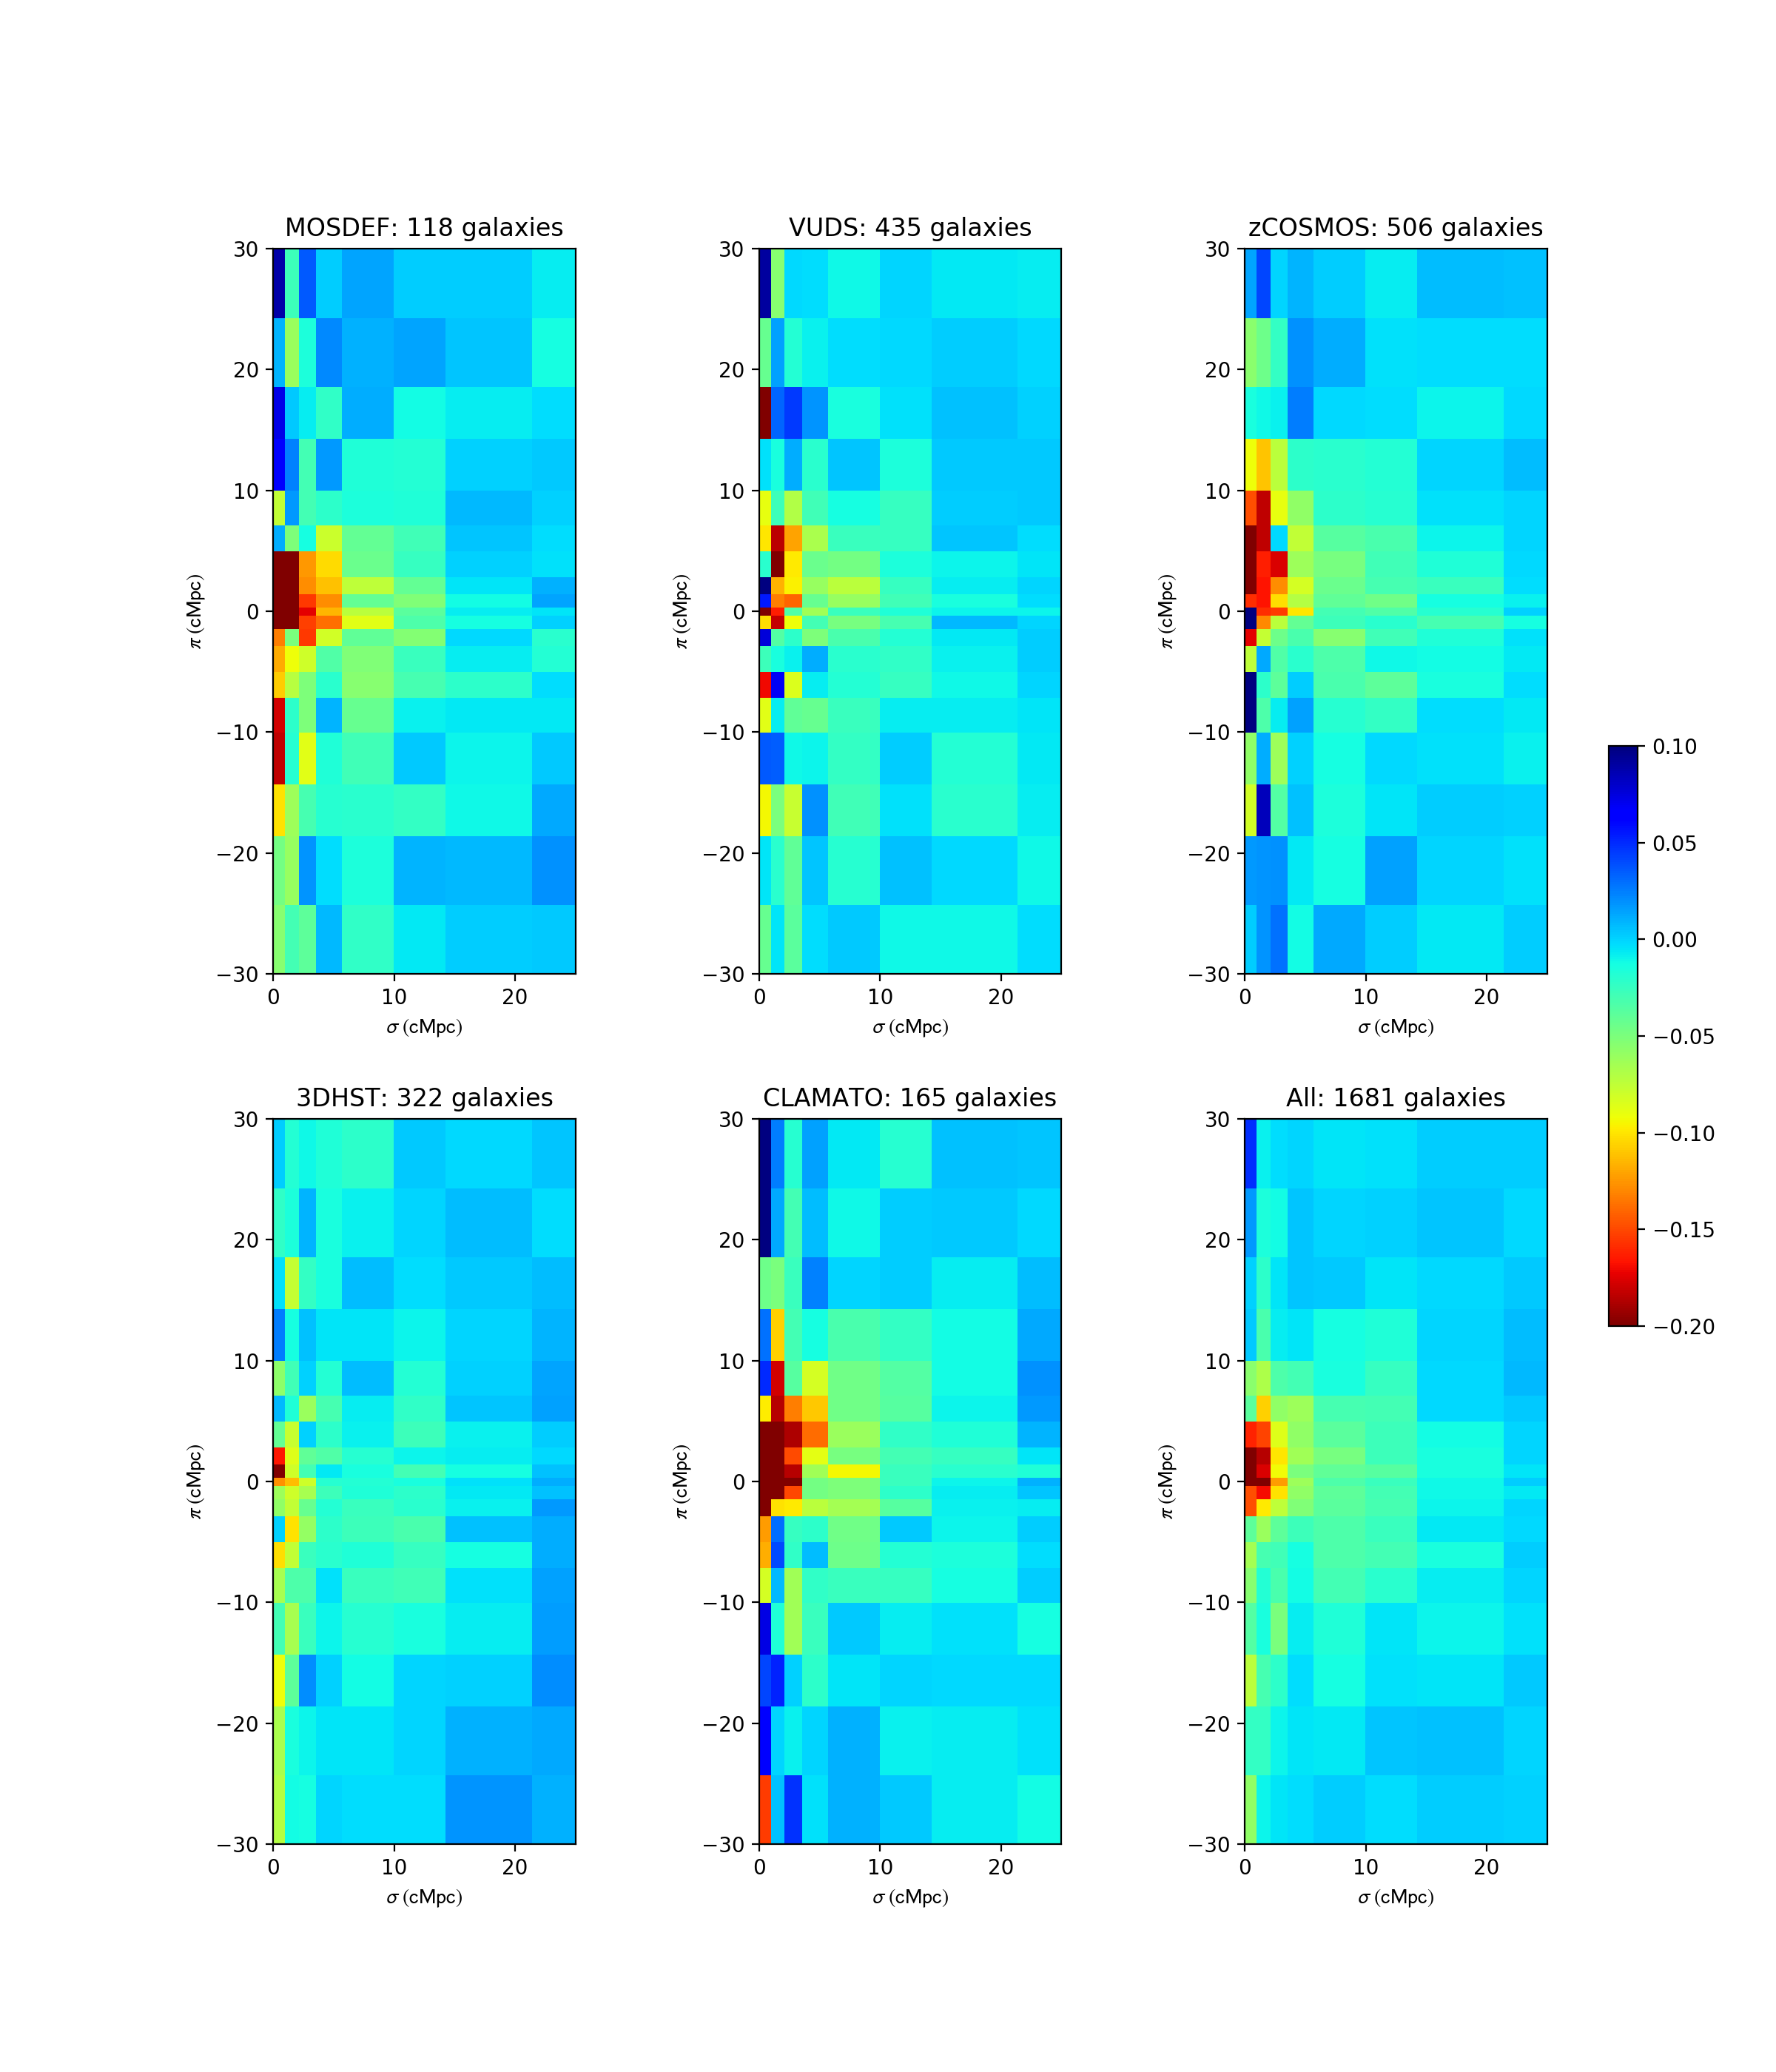

24 24 (23, 9)


In [6]:
X, Y = np.meshgrid(SigEdges, PiEdges)

SigMax = 25.
PiMin = -30.
PiMax = 30.

fig, ((ax1, ax2, ax3),(ax4,ax5,ax6))= plt.subplots(2,3, figsize=(12,14))

print(len(X), len(Y), np.shape(XCorrPlot_mosdef))

ax1.pcolormesh(X, Y, XCorrPlot_mosdef,cmap='jet_r',vmin=-0.2, vmax=0.1 )
ax1.set_aspect('equal')
ax1.set_xlim(np.min(X), SigMax)
ax1.set_ylim(PiMin, PiMax)
ax1.set_xlabel(r'$\sigma\; (\mathrm{cMpc})$')
ax1.set_ylabel(r'$\pi\; (\mathrm{cMpc})$')
ax1.set_title("MOSDEF: %i galaxies" % len(gal_mosdef))

ax2.pcolormesh(X, Y, XCorrPlot_vuds,cmap='jet_r',vmin=-0.2, vmax=0.1 )
ax2.set_aspect('equal')
ax2.set_xlim(np.min(X), SigMax)
ax2.set_ylim(PiMin, PiMax)
ax2.set_xlabel(r'$\sigma\; (\mathrm{cMpc})$')
ax2.set_ylabel(r'$\pi\; (\mathrm{cMpc})$')
ax2.set_title("VUDS: %i galaxies" % len(gal_vuds))

ax3.pcolormesh(X, Y, XCorrPlot_zD,cmap='jet_r',vmin=-0.2, vmax=0.1 )
ax3.set_aspect('equal')
ax3.set_xlim(np.min(X), SigMax)
ax3.set_ylim(PiMin, PiMax)
ax3.set_xlabel(r'$\sigma\; (\mathrm{cMpc})$')
ax3.set_ylabel(r'$\pi\; (\mathrm{cMpc})$')
ax3.set_title("zCOSMOS: %i galaxies" % len(gal_zD))

pcm=ax4.pcolormesh(X, Y, XCorrPlot_3d,cmap='jet_r',vmin=-0.2, vmax=0.1 )
ax4.set_aspect('equal')
ax4.set_xlim(np.min(X), SigMax)
ax4.set_ylim(PiMin, PiMax)
ax4.set_xlabel(r'$\sigma\; (\mathrm{cMpc})$')
ax4.set_ylabel(r'$\pi\; (\mathrm{cMpc})$')
ax4.set_title("3DHST: %i galaxies" % len(gal_3d))

pcm=ax5.pcolormesh(X, Y, XCorrPlot_clamato,cmap='jet_r',vmin=-0.2, vmax=0.1 )
ax5.set_aspect('equal')
ax5.set_xlim(np.min(X), SigMax)
ax5.set_ylim(PiMin, PiMax)
ax5.set_xlabel(r'$\sigma\; (\mathrm{cMpc})$')
ax5.set_ylabel(r'$\pi\; (\mathrm{cMpc})$')
ax5.set_title("CLAMATO: %i galaxies" % len(gal_clamato))

pcm=ax6.pcolormesh(X, Y, XCorrPlot_all,cmap='jet_r',vmin=-0.2, vmax=0.1 )
ax6.set_aspect('equal')
ax6.set_xlim(np.min(X), SigMax)
ax6.set_ylim(PiMin, PiMax)
ax6.set_xlabel(r'$\sigma\; (\mathrm{cMpc})$')
ax6.set_ylabel(r'$\pi\; (\mathrm{cMpc})$')
ax6.set_title("All: %i galaxies" % len(gal))

ax6pos = ax6.get_position()
cbaxes = fig.add_axes([ax6pos.x0+0.04, ax6pos.y0+0.25, ax6pos.width, ax6pos.height*0.8])
cbaxes.axis('off')
fig.colorbar(pcm, ax=cbaxes)

#fig.subplots_adjust(wspace=-0.1)

plt.show()